In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import svm
from sklearn.metrics import classification_report

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [104]:
from sklearn.metrics import confusion_matrix

In [2]:
base_dir = '/Users/vaibhav/MiscProjects/question-classification/'

In [3]:
data_df2_tr3 = pickle.load(open(base_dir + 'data_df2_tr3.pkl', 'rb'))
data_df2_ts3 = pickle.load(open(base_dir + 'data_df2_ts3.pkl', 'rb'))

In [4]:
x_tr3 = data_df2_tr3.values[:, 37:]
x_ts3 = data_df2_ts3.values[:, 37:]
y_tr3 = data_df2_tr3.values[:, 4:9]
y_ts3 = data_df2_ts3.values[:, 4:9]

In [6]:
print(x_tr3.shape)
print(x_ts3.shape)
print(y_tr3.shape)
print(y_ts3.shape)

(401, 1024)
(125, 1024)
(401, 5)
(125, 5)


In [7]:
y_tr3_ = np.argmax(y_tr3, axis=1)
y_ts3_ = np.argmax(y_ts3, axis=1)

In [8]:
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')

In [9]:
clf.fit(x_tr3, y_tr3_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
clf.decision_function_shape = 'ovr'

In [15]:
y_ts_pred = clf.decision_function(x_ts3)

In [16]:
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), np.argmax(y_ts_pred, axis=1), 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.720000,0.720000,0.720,25.0
1,0.697674,0.833333,0.600,25.0
2,0.653846,0.629630,0.680,25.0
3,0.440678,0.382353,0.520,25.0
4,0.565217,0.619048,0.520,25.0
micro avg,0.608000,0.608000,0.608,125.0
macro avg,0.615483,0.636873,0.608,125.0
weighted avg,0.615483,0.636873,0.608,125.0


In [19]:
svm2 = svm.NuSVC(nu=0.5, 
                 kernel='rbf', 
                 degree=3, 
                 gamma='auto_deprecated')

In [20]:
svm2.fit(x_tr3, y_tr3_)

/Users/vaibhav/anaconda/envs/for_bert/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [21]:
y_ts_pred = svm2.decision_function(x_ts3)

In [22]:
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), np.argmax(y_ts_pred, axis=1), 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.708333,0.739130,0.680,25.0
1,0.636364,0.736842,0.560,25.0
2,0.629630,0.586207,0.680,25.0
3,0.421053,0.375000,0.480,25.0
4,0.553191,0.590909,0.520,25.0
micro avg,0.584000,0.584000,0.584,125.0
macro avg,0.589714,0.605618,0.584,125.0
weighted avg,0.589714,0.605618,0.584,125.0


In [24]:
rf1 = RandomForestClassifier(n_estimators=100)

In [25]:
rf1.fit(x_tr3, y_tr3_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
y_ts_pred = rf1.predict(x_ts3)

In [27]:
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.615385,0.592593,0.640,25.0
1,0.595745,0.636364,0.560,25.0
2,0.615385,0.592593,0.640,25.0
3,0.392157,0.384615,0.400,25.0
4,0.458333,0.478261,0.440,25.0
micro avg,0.536000,0.536000,0.536,125.0
macro avg,0.535401,0.536885,0.536,125.0
weighted avg,0.535401,0.536885,0.536,125.0


In [29]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)

In [30]:
gpc.fit(x_tr3, y_tr3_)

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=0, warm_start=False)

In [31]:
y_ts_pred = gpc.predict(x_ts3)

In [32]:
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

/Users/vaibhav/anaconda/envs/for_bert/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1-score,precision,recall,support
0,0.000000,0.00,0.00,25.0
1,0.000000,0.00,0.00,25.0
2,0.000000,0.00,0.00,25.0
3,0.066667,0.20,0.04,25.0
4,0.331034,0.20,0.96,25.0
micro avg,0.200000,0.20,0.20,125.0
macro avg,0.079540,0.08,0.20,125.0
weighted avg,0.079540,0.08,0.20,125.0


In [35]:
kernel = 1.0 * DotProduct(sigma_0=1.0)**2
gpc2 = GaussianProcessClassifier(kernel=kernel, random_state=0)

In [36]:
gpc2.fit(x_tr3, y_tr3_)

/Users/vaibhav/anaconda/envs/for_bert/lib/python3.6/site-packages/sklearn/gaussian_process/gpc.py:413: RuntimeWarning: overflow encountered in exp
  - np.log(np.diag(L)).sum()
/Users/vaibhav/anaconda/envs/for_bert/lib/python3.6/site-packages/sklearn/gaussian_process/gpc.py:417: RuntimeWarning: invalid value encountered in double_scalars
  if lml - log_marginal_likelihood < 1e-10:


GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * DotProduct(sigma_0=1) ** 2,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=0, warm_start=False)

In [37]:
y_ts_pred = gpc2.predict(x_ts3)

In [38]:
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.693878,0.708333,0.680,25.0
1,0.708333,0.739130,0.680,25.0
2,0.641509,0.607143,0.680,25.0
3,0.480000,0.480000,0.480,25.0
4,0.560000,0.560000,0.560,25.0
micro avg,0.616000,0.616000,0.616,125.0
macro avg,0.616744,0.618921,0.616,125.0
weighted avg,0.616744,0.618921,0.616,125.0


In [214]:
neigh = KNeighborsClassifier(n_neighbors=7, metric='cosine', algorithm='brute')

In [215]:
neigh.fit(x_tr3, y_tr3_)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [216]:
y_ts_pred = neigh.predict(x_ts3)
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.538462,0.518519,0.560,25.0
1,0.604651,0.722222,0.520,25.0
2,0.640000,0.640000,0.640,25.0
3,0.538462,0.518519,0.560,25.0
4,0.566038,0.535714,0.600,25.0
micro avg,0.576000,0.576000,0.576,125.0
macro avg,0.577522,0.586995,0.576,125.0
weighted avg,0.577522,0.586995,0.576,125.0


In [67]:
y_tr_pred = neigh.predict(x_tr3)
pd.DataFrame(classification_report(np.argmax(y_tr3, axis=1), y_tr_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.687500,0.687500,0.687500,80.0
1,0.734940,0.709302,0.762500,80.0
2,0.768116,0.913793,0.662500,80.0
3,0.633540,0.637500,0.629630,81.0
4,0.757062,0.690722,0.837500,80.0
micro avg,0.715711,0.715711,0.715711,401.0
macro avg,0.716232,0.727763,0.715926,401.0
weighted avg,0.716025,0.727538,0.715711,401.0


In [77]:
neigh2 = KNeighborsClassifier(n_neighbors=7, p=)
neigh2.fit(x_tr3, y_tr3_)
y_ts_pred = neigh2.predict(x_ts3)
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.481481,0.448276,0.520,25.0
1,0.545455,0.631579,0.480,25.0
2,0.585366,0.750000,0.480,25.0
3,0.468085,0.500000,0.440,25.0
4,0.468750,0.384615,0.600,25.0
micro avg,0.504000,0.504000,0.504,125.0
macro avg,0.509827,0.542894,0.504,125.0
weighted avg,0.509827,0.542894,0.504,125.0


In [79]:
nc1 = NearestCentroid()
nc1.fit(x_tr3, y_tr3_)
y_ts_pred = nc1.predict(x_ts3)
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.625000,0.652174,0.600,25.0
1,0.511628,0.611111,0.440,25.0
2,0.640000,0.640000,0.640,25.0
3,0.518519,0.482759,0.560,25.0
4,0.618182,0.566667,0.680,25.0
micro avg,0.584000,0.584000,0.584,125.0
macro avg,0.582666,0.590542,0.584,125.0
weighted avg,0.582666,0.590542,0.584,125.0


In [91]:
from scipy.spatial import distance
from scipy import stats
def knn_with_cosine(x_tr, y_tr, rec, k=5):
    nrecs = x_tr.shape[0]
    distances = np.zeros((nrecs,), dtype='float32')
    for i in range(0, nrecs):
        distances[i] = distance.cosine(rec, x_tr[i, :])
        rank = np.argsort(distances)
        pred = stats.mode(y_tr[rank[0:k]]).mode[0]
    return pred

In [98]:
x_tr3 = np.array(x_tr3, dtype=np.float32)
x_ts3 = np.array(x_ts3, dtype=np.float32)

In [102]:
def pred_knn(x_tr, y_tr, x_ts, k=5):
    nrec_ts = x_ts.shape[0]
    preds = np.zeros((nrec_ts,), dtype='int32')
    for i in range(0, nrec_ts):
        preds[i] = knn_with_cosine(x_tr, y_tr, x_ts[i, :], k=k)
    return preds

In [103]:
y_ts_pred = pred_knn(x_tr3, y_tr3_, x_ts3, k=7)
pd.DataFrame(classification_report(np.argmax(y_ts3, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.538462,0.518519,0.560,25.0
1,0.604651,0.722222,0.520,25.0
2,0.640000,0.640000,0.640,25.0
3,0.538462,0.518519,0.560,25.0
4,0.566038,0.535714,0.600,25.0
micro avg,0.576000,0.576000,0.576,125.0
macro avg,0.577522,0.586995,0.576,125.0
weighted avg,0.577522,0.586995,0.576,125.0


In [105]:
confusion_matrix(y_ts3_, y_ts_pred)

array([[14,  0,  1,  5,  5],
       [ 8, 13,  1,  2,  1],
       [ 0,  1, 16,  2,  6],
       [ 4,  3,  3, 14,  1],
       [ 1,  1,  4,  4, 15]])

In [ ]:
# check top-2 accuracy
# check misclassifications

In [106]:
# t-sne visualization of train, test
from sklearn import manifold

In [257]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=1, metric='cosine')

In [258]:
x_tr_tsne = tsne.fit_transform(x_tr3)

In [219]:
x_tr_tsne.shape

(401, 2)

In [110]:
import matplotlib.pyplot as plt

In [111]:
%matplotlib inline

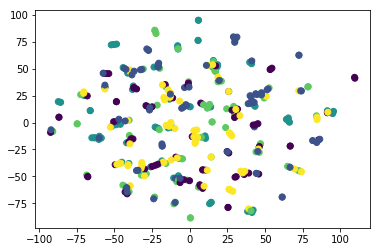

In [259]:
fig, ax = plt.subplots()
ax.scatter(x_tr_tsne[:, 0], x_tr_tsne[:, 1], c=y_tr3_)

In [138]:
import umap

In [282]:
fit = umap.UMAP(n_neighbors=50,
        min_dist=0.5,
        #n_components=n_components,
        metric='cosine')

In [283]:
u = fit.fit_transform(x_tr3)

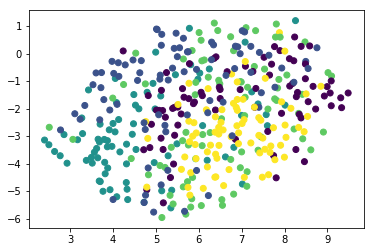

In [284]:
fig, ax = plt.subplots()
ax.scatter(u[:, 0], u[:, 1], c=y_tr3_)

In [196]:
# try glove embeddings
data_df2_tr4 = pickle.load(open(base_dir + 'data_df2_tr4.pkl', 'rb'))
data_df2_ts4 = pickle.load(open(base_dir + 'data_df2_ts4.pkl', 'rb'))

In [197]:
x_tr4 = data_df2_tr4.values[:, 37:]
x_ts4 = data_df2_ts4.values[:, 37:]
y_tr4 = data_df2_tr4.values[:, 4:9]
y_ts4 = data_df2_ts4.values[:, 4:9]

In [198]:
print(x_tr4.shape)
print(x_ts4.shape)
print(y_tr4.shape)
print(y_ts4.shape)

(401, 50)
(125, 50)
(401, 5)
(125, 5)


In [199]:
y_tr4_ = np.argmax(y_tr4, axis=1)
y_ts4_ = np.argmax(y_ts4, axis=1)

In [200]:
nc2 = NearestCentroid()
nc2.fit(x_tr4, y_tr4_)
y_ts_pred = nc2.predict(x_ts4)
pd.DataFrame(classification_report(np.argmax(y_ts4, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.490566,0.464286,0.52,25.0
1,0.428571,0.529412,0.36,25.0
2,0.533333,0.457143,0.64,25.0
3,0.372093,0.444444,0.32,25.0
4,0.538462,0.518519,0.56,25.0
micro avg,0.480000,0.480000,0.48,125.0
macro avg,0.472605,0.482761,0.48,125.0
weighted avg,0.472605,0.482761,0.48,125.0


In [212]:
knn2 = KNeighborsClassifier(n_neighbors=7, metric='cosine', algorithm='brute')

In [213]:
knn2.fit(x_tr4, y_tr4_)
y_ts_pred = knn2.predict(x_ts4)
pd.DataFrame(classification_report(np.argmax(y_ts4, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.285714,0.258065,0.320,25.0
1,0.470588,0.461538,0.480,25.0
2,0.408163,0.416667,0.400,25.0
3,0.454545,0.526316,0.400,25.0
4,0.320000,0.320000,0.320,25.0
micro avg,0.384000,0.384000,0.384,125.0
macro avg,0.387802,0.396517,0.384,125.0
weighted avg,0.387802,0.396517,0.384,125.0


In [209]:
# try with higher dim glove
data_df2_tr5 = pickle.load(open(base_dir + 'data_df2_tr5.pkl', 'rb'))
data_df2_ts5 = pickle.load(open(base_dir + 'data_df2_ts5.pkl', 'rb'))

x_tr5 = data_df2_tr5.values[:, 37:]
x_ts5 = data_df2_ts5.values[:, 37:]
y_tr5 = data_df2_tr5.values[:, 4:9]
y_ts5 = data_df2_ts5.values[:, 4:9]

print(x_tr5.shape)
print(x_ts5.shape)
print(y_tr5.shape)
print(y_ts5.shape)

y_tr5_ = np.argmax(y_tr5, axis=1)
y_ts5_ = np.argmax(y_ts5, axis=1)

(401, 300)
(125, 300)
(401, 5)
(125, 5)


In [211]:
knn3 = KNeighborsClassifier(n_neighbors=7, metric='cosine', algorithm='brute')
knn3.fit(x_tr5, y_tr5_)
y_ts_pred = knn3.predict(x_ts5)
pd.DataFrame(classification_report(np.argmax(y_ts5, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.391304,0.428571,0.36,25.0
1,0.520000,0.520000,0.52,25.0
2,0.431373,0.423077,0.44,25.0
3,0.468085,0.500000,0.44,25.0
4,0.392857,0.354839,0.44,25.0
micro avg,0.440000,0.440000,0.44,125.0
macro avg,0.440724,0.445297,0.44,125.0
weighted avg,0.440724,0.445297,0.44,125.0


In [289]:
# try with gpt2 embeddings
data_df2_tr6 = pickle.load(open(base_dir + 'data_df2_tr6.pkl', 'rb'))
data_df2_ts6 = pickle.load(open(base_dir + 'data_df2_ts6.pkl', 'rb'))

x_tr6 = data_df2_tr6.values[:, 9:]
x_ts6 = data_df2_ts6.values[:, 9:]
y_tr6 = data_df2_tr6.values[:, 4:9]
y_ts6 = data_df2_ts6.values[:, 4:9]

print(x_tr6.shape)
print(x_ts6.shape)
print(y_tr6.shape)
print(y_ts6.shape)

y_tr6_ = np.argmax(y_tr6, axis=1)
y_ts6_ = np.argmax(y_ts6, axis=1)

(401, 768)
(125, 768)
(401, 5)
(125, 5)


In [299]:
knn4 = KNeighborsClassifier(n_neighbors=7, 
                            #metric='cosine', 
                            algorithm='brute')
knn4.fit(x_tr6, y_tr6_)
y_ts_pred = knn4.predict(x_ts6)
pd.DataFrame(classification_report(np.argmax(y_ts6, axis=1), y_ts_pred, 
             output_dict=True)).transpose()

,f1-score,precision,recall,support
0,0.218182,0.200000,0.24,25.0
1,0.350877,0.312500,0.40,25.0
2,0.297872,0.318182,0.28,25.0
3,0.320000,0.320000,0.32,25.0
4,0.195122,0.250000,0.16,25.0
micro avg,0.280000,0.280000,0.28,125.0
macro avg,0.276411,0.280136,0.28,125.0
weighted avg,0.276411,0.280136,0.28,125.0


In [ ]:
# try top-2 accuracy, precision, recall